In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os


In [2]:
city_data_df = pd.read_csv("Resource/city_data.csv")
ride_file_df = pd.read_csv("Resource/ride_data.csv")

In [3]:
pyber_data_df = pd.merge(right = city_data_df, left=ride_file_df, on = ['city', 'city'] )
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban


In [4]:
Urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
Suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']


In [5]:
Urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban


In [6]:
# Get the number of rides for urban cities.
urban_ride_count = Urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = Suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [7]:
urban_avg_fare = Urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = Suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [8]:
# Get the average number of drivers for each urban city
urban_avg_driver = Urban_cities_df.groupby(['city']).mean()['driver_count']

suburban_avg_driver = Suburban_cities_df.groupby(['city']).mean()['driver_count']

rural_avg_driver = rural_cities_df.groupby(['city']).mean()['driver_count']

urban_driver_count = Urban_cities_df.groupby(['city']).count()['driver_count']
suburban_driver_count = Suburban_cities_df.groupby(['city']).count()['driver_count']

rural_driver_count= rural_cities_df.groupby(['city']).count()['driver_count']

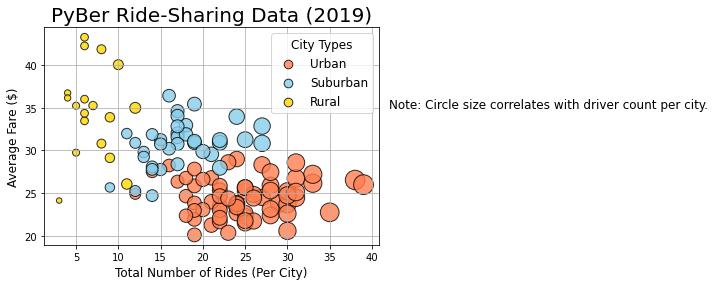

<Figure size 432x288 with 0 Axes>

In [85]:
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Show the plot

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)

plt.legend()
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)


plt.grid(True)
# Show the plot


plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
plt.show()
plt.savefig("Resource/analysis/Fig1.png")



In [26]:
Urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [27]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [28]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [29]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [48]:
suburban_driver_count.mode()

0    17
dtype: int64

In [36]:
rural_ride_count.mode()

0    6
dtype: int64

In [54]:
import scipy.stats as sts
import numpy as np

In [46]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
mode_suburban_ride_count

ModeResult(mode=array([17]), count=array([7]))

In [47]:
mode_rural_ride_count = sts.mode(rural_driver_count)
mode_rural_ride_count

ModeResult(mode=array([6]), count=array([5]))

In [52]:
urban_fares = Urban_cities_df["fare"]
suburban_fares = Suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

In [55]:
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [100]:
urban_driver_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: driver_count, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

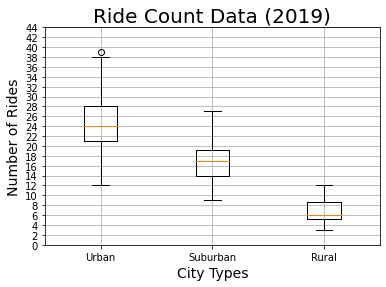

In [101]:
# Create a box-and-whisker plot for the urban cities ride count by usin ax.boxplot()

x_labels = ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots()

ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)

ax.set_yticks(np.arange(0, 45, step=2.0))
ax.grid()
plt.savefig("Resource/analysis/Fig2.png")
plt.show

In [102]:
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [103]:
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
urban_city_outlier

'West Angela'

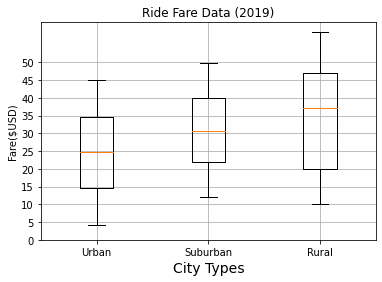

In [107]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots()
fare = [urban_fares,suburban_fares, rural_fares]
ax.boxplot(fare, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.savefig("Resource/analysis/Fig3.png")
plt.show()




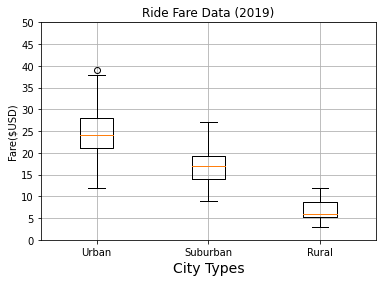

In [108]:
x_labels = ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots()
driver_count = [urban_driver_count,suburban_driver_count,rural_driver_count]
ax.boxplot(driver_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.savefig("Resource/analysis/Fig4.png")
plt.show()

In [110]:
# Get the sum of the fares for each city type.
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban


In [122]:
sum_fare_by_type = pyber_data_df.groupby(['type']).sum()['fare']
sum_fare_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [125]:
Total_fare = pyber_data_df['fare'].sum()
type_percents = 100 * sum_fare_by_type / Total_fare

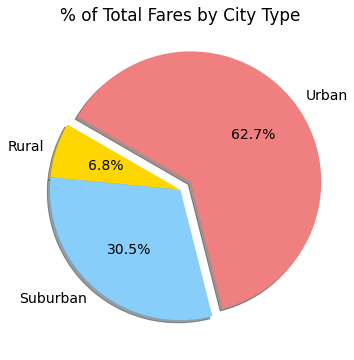

In [127]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("Resource/analysis/Fig5.png")
# Show Figure
plt.show()

In [132]:
# Get the sum of the RIDE for each city type
ride_percentages =100*  pyber_data_df.groupby(['type']).sum()['ride_id']/pyber_data_df['ride_id'].sum() 

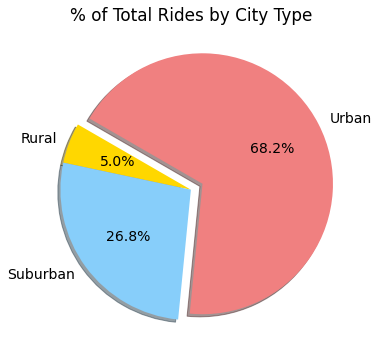

In [133]:
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(ride_percentages,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("Resource/analysis/Fig6.png")
# Show Figure
plt.show()

In [149]:
# Get the sum of the drivers for each city type

drives_percentage = 100 *city_data_df.groupby(["type"]).sum()["driver_count"] /city_data_df["driver_count"].sum()



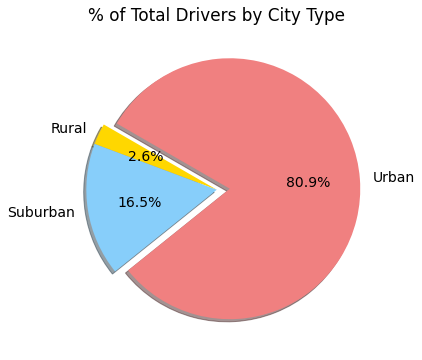

In [150]:
import matplotlib as mpl
plt.subplots(figsize=(10, 6))
plt.pie(drives_percentage,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("Resource/analysis/Fig7.png")
# Show Figure
plt.show()